### 0.初始化

In [ ]:
 # 使用正斜杠
from qtmodel import *
mdb.set_url("http://10.33.176.44:61076/")
mdb.initial()

### 1.节点

In [3]:
# 新建单个节点
mdb.add_nodes([[1,1,32,3]])
mdb.update_model()

In [9]:
# 批量新建节点
nodes_data=[[i+1,i+2,32,3] for i in range(20)]
mdb.add_nodes(nodes_data)    
mdb.update_model()

### 2.单元

In [10]:
mdb.add_elements([[i+1,1,1,1,0,i+1,i+2] for i in range(10)]) 
mdb.update_model()

*ELEMENT
1,1,1,1,0,1,2
2,1,1,1,0,2,3
3,1,1,1,0,3,4
4,1,1,1,0,4,5
5,1,1,1,0,5,6
6,1,1,1,0,6,7
7,1,1,1,0,7,8
8,1,1,1,0,8,9
9,1,1,1,0,9,10
10,1,1,1,0,10,11



In [ ]:
# 新建板单元
mdb.add_nodes([[1,1,32,3],[2,11,32,3],[3,11,50,3],[4,1,50,3]])
mdb.add_element(index=1,ele_type=4,node_ids=[1,2,3,4],beta_angle=0,mat_id=1,sec_id=1, plate_type=0)
mdb.update_model()

### 3.结构组

In [11]:
# *STRGROUP
mdb.add_structure_group(name="测试结构组1",node_ids=[1,2,3,4,6,7,8,10],element_ids="1to5")
mdb.add_structure_group(name="测试结构组2",node_ids="2to7",element_ids=[1,2,3])
mdb.update_model()

*STRGROUP
测试结构组1,1to4 6to8 10,1to5

*STRGROUP
测试结构组2,2to7,1to3



In [12]:
mdb.update_structure_group_name(name="测试结构组1",new_name="新结构组1")
mdb.update_model()

In [13]:
mdb.update_structure_group(name="测试结构组2",new_name="新结构组2",node_ids=[1,2,3,4],element_ids="2to5")
mdb.update_model()

In [19]:
mdb.update_structure_group(name="新结构组2",new_name="结构组1",node_ids=[9,10,11])
mdb.update_model()

In [20]:
mdb.remove_structure_group()
mdb.update_model()

In [17]:
mdb.add_structure_to_group(name="新结构组2",node_ids=[12,13,14])
mdb.update_model()

In [18]:
mdb.remove_structure_from_group(name="新结构组2",node_ids=[1,2,3,4],element_ids="2to3")
mdb.update_model()

### 4.材料

In [ ]:
# *MAT-INFO ;材料详细信息
mdb.add_material(index=11,name="混凝土材料1",mat_type=1,standard=1,database="C50")
mdb.add_material(index=13,name="钢材材料1",mat_type=2,standard=1,database="Q235",modified=True,data_info=[3.5e10,2.5e4,0.2,1.5e-5])
mdb.add_material(index=12,name="自定义材料1",mat_type=5,data_info=[3.5e10,2.5e4,0.2,1.5e-5])
mdb.update_model()

In [ ]:
# *CREEPFCT     ;徐变函数
mdb.add_creep_function(name="徐变函数1",creep_data=[(5,0.5),(100,0.75)],scale_factor=0.5)
mdb.update_model()

In [ ]:
# *SHRINKFCT     ;收缩函数
mdb.add_shrink_function(name="收缩函数1",shrink_data=[(5,0.5),(100,0.75)],scale_factor=0.5)
mdb.update_model()

In [ ]:
# *TDMATERIAL     ;收缩徐变
mdb.add_time_parameter(index=6, name="收缩徐变测试1", code_index=1,time_parameter=[70,5,3,0])
mdb.add_time_parameter(index=6, name="收缩徐变自定义测试1", code_index=1000,shrink_data="收缩函数1",creep_data=[("徐变函数1", 95.5), ("徐变函数2", 87.3)])
mdb.update_model()

### 5.截面

##### 5.1截面详细信息

In [6]:
# 一般参数截面
mdb.add_section(index=1,name="新建矩形截面1",sec_type="矩形",sec_info=[2,4],bias_type="中心")
mdb.update_model()

*SEC-INFO
ID=1,新建矩形截面1,矩形,YES,质心,中心
2,4



In [5]:
# 混凝土箱梁
mdb.add_section(index=2,name="新建混凝土箱梁2",sec_type="混凝土箱梁",box_height=2,box_num=3,sec_info=[0.2,0.4,0.1,0.13,3,1,2,1,0.02,0,12,5,6,0.28,0.3,0.5,0.5,0.5,0.2],chamfer_info=["1*0.2,0.1*0.2","0.5*0.15,0.3*0.2","0.4*0.2","0.5*0.2"],box_other_info={"i1":[1,2,3,4],"B4":[2,3,4,5]},bias_x=1)
mdb.add_section(index=3,name="新建混凝土箱梁3",sec_type="混凝土箱梁",box_height=2,box_num=3,symmetry=False,sec_info=[0.2,0.4,0.1,0.13,3,1,2,1,0.02,0,12,5,6,0.28,0.3,0.5,0.5,0.5,0.2],sec_right=[0.2,0.4,0.1,0.13,3,1,2,1,0.02,0,14,5,6,0.28,0.3,0.5,0.5,0.5,0.2],chamfer_info=["1*0.2,0.1*0.2","0.5*0.15,0.3*0.2","0.4*0.2","0.5*0.2"],chamfer_right=["1*0.3,0.1*0.2","0.5*0.15,0.3*0.3","0.4*0.2","0.4*0.2"])
mdb.update_model()

*SEC-INFO
ID=2,新建混凝土箱梁2,混凝土箱梁,YES,1,0
24,3,2,YES
0.2,0.4,0.1,0.13,3,1,2,1,0.02,0,12,5,6,0.28,0.3,0.5,0.5,0.5,0.2
(1,0.2,0.1,0.2),(0.4,0.2),(0.5,0.15,0.3,0.2),(0.5,0.2)
Li1=1,2,3,4
LB4=2,3,4,5

*SEC-INFO
ID=3,新建混凝土箱梁3,混凝土箱梁,YES,质心,中心
26,3,2,NO
0.2,0.4,0.1,0.13,3,1,2,1,0.02,0,12,5,6,0.28,0.3,0.5,0.5,0.5,0.2
(1,0.2,0.1,0.2),(0.4,0.2),(0.5,0.15,0.3,0.2),(0.5,0.2)
0.2,0.4,0.1,0.13,3,1,2,1,0.02,0,14,5,6,0.28,0.3,0.5,0.5,0.5,0.2
(1,0.3,0.1,0.2),(0.4,0.2),(0.5,0.15,0.3,0.3),(0.4,0.2)



In [4]:
# 钢梁
mdb.add_section(index=4,name="钢梁截面4",sec_type="工字钢梁",sec_info=[0,0,0.5,0.5,0.5,0.5,0.7,0.02,0.02,0.02])
mdb.add_section(index=5,name="钢梁截面5",sec_type="箱型钢梁",sec_info=[0,0.15,0.25,0.5,0.25,0.15,0.4,0.15,0.7,0.02,0.02,0.02,0.02],rib_info = {"板肋": [0.1,0.02],"T形肋":[0.1,0.02,0.02,0.02]},rib_place = [(1, 0, 0.1, "板肋", 2, "板肋1"),(1, 0, 0.2, "T形肋", 0, "默认名称")])
mdb.update_model()

*SEC-INFO
ID=4,钢梁截面4,工字钢梁,YES,质心,中心
0,0,0.5,0.5,0.5,0.5,0.7,0.02,0.02,0.02

*SEC-INFO
ID=5,钢梁截面5,箱型钢梁,YES,质心,中心
0,0.15,0.25,0.5,0.25,0.15,0.4,0.15,0.7,0.02,0.02,0.02,0.02
RIB=板肋,0.1,0.02
RIB=T形肋,0.1,0.02,0.02,0.02
PLACE=1,0,0.1,板肋,2,板肋1
PLACE=1,0,0.2,T形肋,0,默认名称



In [ ]:
# 自定义、特性截面
mdb.add_section(index=6,name="自定义截面6",sec_type="自定义线圈截面",loop_segments=[{"main":[(0,0),(0,1.00203666),(1.747454175,1.00203666),(1.747454175,0)],"sub":[(0.16700611,0.122199593),(0.16700611,0.859470468),(1.617107943,0.859470468),(1.617107943,0.122199593)]}])
mdb.add_section(index=1,name="beam-1",sec_info=[5.13727,5.14,5.14,252,238,600,0,21.5,21.5,8.2,5.3,0,0,21.5,5.3,-21.5,8.2,21.5,8.2,21.5,-5.3,-21.5,-5.3,0,0,0,0,0,0],sec_type="特性截面",shear_consider=False,bias_type="中心")
mdb.add_section(index=7,name="自定义截面7",sec_type="自定义线宽截面",sec_lines=[(0,0.1,0.1,0.2,0.01),])
mdb.add_section(index=8,name="自定义截面8",sec_type="特性截面",sec_property=[1,1,1,1,1,1,1,2,2,2,3,1,1,2,3,2,1,2,2,3,1,2,2,0,0,0,0,0,0])
mdb.update_model()

*SEC-INFO
ID=6,自定义截面6,自定义线圈截面,YES,质心,中心
MAIN=(0,0),(0,1.00204),(1.74745,1.00204),(1.74745,0)
SUB=(0.167006,0.1222),(0.167006,0.85947),(1.61711,0.85947),(1.61711,0.1222)

*SEC-INFO
ID=7,自定义截面7,自定义线宽截面,YES,质心,中心
LINE=0,0.1,0.1,0.2,0.01

*SEC-INFO
ID=8,自定义截面8,特性截面,YES,质心,中心
1,1,1,1,1,1,1,2,2,2,3,1,1,2,3,2,1,2,2,3,1,2,2,0,0,0,0,0,0



In [2]:
# 组合截面
mdb.add_section(index=9,name="新建工字组合梁1",sec_type="工字组合梁",sec_info=[2,0.2,1.5,2,2,0.02,0.02,0.02],mat_combine=[5.971,3.14,0.3,0.2,1.2])
mdb.add_section(index=10,name="新建组合梁2",sec_type="自定义组合梁",loop_segments=[{"main":[(0.85443881,0.885687477),(1.598966796,1.460410835),(2.375632991,0.929921927),(2.111111111,0.027338393),(1.170961404,0)]}],mat_combine=[5.971,3.14,0.3,0.2,1.2],secondary_loop_segments=[{"main":[(0,0),(0,1.00203666),(1.747454175,1.00203666),(1.747454175,0)],"sub":[(0.16700611,0.122199593),(0.16700611,0.859470468),(1.617107943,0.859470468),(1.617107943,0.122199593)]}])
mdb.add_section(index=11,name="新建钢箱砼截面3",sec_type="钢箱砼",sec_info=[2,1.5,1.2,0.02,0.016,0.016],mat_combine=[5.971,3.14,0.3,0.2,1.2])
mdb.update_model()

*SEC-INFO
ID=9,新建工字组合梁1,工字组合梁,YES,质心,中心
2,0.2,1.5,2,2,0.02,0.02,0.02
5.971,3.14,0.3,0.2,1.2

*SEC-INFO
ID=10,新建组合梁2,自定义组合梁,YES,质心,中心
5.971,3.14,0.3,0.2,1.2
M=
MAIN=(0.854439,0.885687),(1.59897,1.46041),(2.37563,0.929922),(2.11111,0.0273384),(1.17096,0)
S=
MAIN=(0,0),(0,1.00204),(1.74745,1.00204),(1.74745,0)
SUB=(0.167006,0.1222),(0.167006,0.85947),(1.61711,0.85947),(1.61711,0.1222)

*SEC-INFO
ID=11,新建钢箱砼截面3,钢箱砼,YES,质心,中心
2,1.5,1.2,0.02,0.016,0.016
5.971,3.14,0.3,0.2,1.2



In [ ]:
# *SEC-INFO   变截面
mdb.add_tapper_section(index=12,name="变截面12",sec_type="矩形",sec_begin={"sec_info":[1,2],"bias_type":"中心"},sec_end={"sec_info":[2,2],"bias_type":"中心"})

mdb.add_tapper_section(index=13,name="变截面13",sec_type="箱型钢梁",sec_begin={"sec_info":[0,0.15,0.25,0.5,0.25,0.15,0.4,0.15,0.7,0.02,0.02,0.02,0.02],"rib_info":{"板肋": [0.1,0.02],"T形肋":[0.1,0.02,0.02,0.02]},"rib_place":[(1,0,0.1,"板肋",2,"板肋1"),(1,0,0.2,"T形肋",0,"默认名称")]},sec_end={"sec_info":[0,0.15,0.25,0.5,0.25,0.15,0.4,0.15,0.7,0.02,0.02,0.02,0.02]})

mdb.add_tapper_section(index=14,name="变截面14",sec_type="混凝土箱梁",sec_begin={"box_height":2,"box_num":3,"sec_info":[0.2,0.4,0.1,0.13,3,1,2,1,0.02,0,12,5,6,0.28,0.3,0.5,0.5,0.5,0.2],"charm_info":["1*0.2,0.1*0.2","0.5*0.15,0.3*0.2","0.4*0.2","0.5*0.2"],"box_other_info":{"i1":[1,2,3,4],"B4":[2,3,4,5]},"bias_x":1},sec_end={"box_height":2,"box_num":3,"symmetry":False,"sec_info":[0.2,0.4,0.1,0.13,3,1,2,1,0.02,0,12,5,6,0.28,0.3,0.5,0.5,0.5,0.2],"sec_right":[0.2,0.4,0.1,0.13,3,1,2,1,0.02,0,14,5,6,0.28,0.3,0.5,0.5,0.5,0.2],"charm_info":["1*0.2,0.1*0.2","0.5*0.15,0.3*0.2","0.4*0.2","0.5*0.2"],"charm_right":["1*0.3,0.1*0.2","0.5*0.15,0.3*0.3","0.4*0.2","0.4*0.2"]})


mdb.update_model()

*SEC-INFO
ID=12,变截面12,矩形-变截面,YES,质心,中心
质心,中心
I=
1,2
J=
2,2

*SEC-INFO
ID=13,变截面13,箱型钢梁-变截面,YES,质心,中心
质心,中心
I=
0,0.15,0.25,0.5,0.25,0.15,0.4,0.15,0.7,0.02,0.02,0.02,0.02
RIB=板肋,0.1,0.02
RIB=T形肋,0.1,0.02,0.02,0.02
PLACE=1,0,0.1,板肋,2,板肋1
PLACE=1,0,0.2,T形肋,0,默认名称
J=
0,0.15,0.25,0.5,0.25,0.15,0.4,0.15,0.7,0.02,0.02,0.02,0.02

*SEC-INFO
ID=14,变截面14,混凝土箱梁-变截面,YES,1,0
质心,中心
I=
24,3,2,YES
0.2,0.4,0.1,0.13,3,1,2,1,0.02,0,12,5,6,0.28,0.3,0.5,0.5,0.5,0.2
(1,0.2,0.1,0.2),(0.4,0.2),(0.5,0.15,0.3,0.2),(0.5,0.2)
Li1=1,2,3,4
LB4=2,3,4,5
J=
26,3,2,NO
0.2,0.4,0.1,0.13,3,1,2,1,0.02,0,12,5,6,0.28,0.3,0.5,0.5,0.5,0.2
(1,0.2,0.1,0.2),(0.4,0.2),(0.5,0.15,0.3,0.2),(0.5,0.2)
0.2,0.4,0.1,0.13,3,1,2,1,0.02,0,14,5,6,0.28,0.3,0.5,0.5,0.5,0.2
(1,0.3,0.1,0.2),(0.4,0.2),(0.5,0.15,0.3,0.3),(0.4,0.2)



##### 5.2变截面组

In [ ]:
# *TSGROUP
mdb.add_tapper_section_group(ids=[1,2,3,4],name="变截面组1")
mdb.update_model()

### 6.板厚

In [ ]:
# *THICKNESS
mdb.add_thickness(index=1, name="普通板1", t=0.02,thick_type=0,bias_info=(1,0.2))
mdb.add_thickness(index=2, name="加劲板1", t=0.02,thick_type=1,rib_pos=0,dist_v=0.3,rib_v=[1,1,0.02,0.02])
mdb.add_thickness(index=3, name="加劲板2", t=0.02,thick_type=1,rib_pos=0,dist_v=0.6,rib_v=[0.28,0.3,0.19,0.08,0.04])
mdb.update_model()

### 7.边界

##### 7.0新建边界组

In [ ]:
# *BNDRGROUP
mdb.add_boundary_group(name="边界组1")
mdb.add_boundary_group(name="边界组2")
mdb.update_model()

##### 7.1一般支承

In [ ]:
# *GSUPPORT
mdb.add_general_support(node_id="1to10", boundary_info=[True,True,True,False,False,False])
mdb.add_general_support(node_id=[12,13,14,16], boundary_info=[False,False,False,True,True,True])
mdb.add_general_support(node_id=17, boundary_info=[True,True,True,False,False,False])
mdb.update_model()

##### 7.2弹性支承

In [ ]:
# *ESUPPORT
mdb.add_elastic_support(node_id=1,support_type=1,boundary_info=[1e6,0,1e6,0,0,0])
mdb.add_elastic_support(node_id="2to4",support_type=2,boundary_info=[1,1e6])
mdb.add_elastic_support(node_id=[5,6,7,8],support_type=3,boundary_info=[1,1e6])
mdb.update_model()

##### 7.3一般弹性支承

In [ ]:
# *GSPRTYPE
mdb.add_general_elastic_support_property(name = "特性测试1", data_matrix=[i for i in range(1,22)])
# *GSPRING
mdb.add_general_elastic_support(node_id=1, property_name = "特性测试1",group_name="默认边界组")
mdb.update_model()

##### 7.4主从约束

In [ ]:
# *MSLINK
mdb.add_master_slave_link(master_id=1, slave_id=1, boundary_info=[True, True, True, False, False, False])
mdb.add_master_slave_link(master_id=1,slave_id=[2,3],boundary_info=[False,False,False,True,True,True])
mdb.add_master_slave_link(master_id=2, slave_id="4to6", boundary_info=[True, True, True, False, False, False])
mdb.update_model()

##### 7.5弹性连接

In [ ]:
# *ELINK
mdb.add_elastic_link(link_type=1,start_id=1,end_id=2,boundary_info=[1e6,1e6,1e6,0,0,0])
mdb.add_elastic_link(link_type=2,start_id=1,end_id=2)
mdb.add_elastic_link(link_type=3,start_id=1,end_id=2,kx=1e6)
mdb.update_model()

##### 7.6约束方程

In [ ]:
# *EQUATION
mdb.add_constraint_equation(name="约束方程1",sec_node=1,sec_dof=1,
                            master_info=[(8, 1, 1.0),(9, 2, -0.5),(10, 3, 0.8)])
mdb.update_model()

##### 7.7梁端约束

In [ ]:
# *RESTRAINTS
mdb.add_beam_constraint(beam_id=2, info_i=[True, True, True, False, False, False],
                        info_j=[True, True, True, False, False, False])
mdb.update_model()

##### 7.8节点坐标系

In [ ]:
# *LOCALAXIS
mdb.add_node_axis(input_type=1,node_id=2,angle_info=[45,45,45])
mdb.add_node_axis(input_type=2,node_id=3,coord_info=[[0,0,1],[0,1,0],[1,0,0]])
mdb.add_node_axis(input_type=3,node_id=4,coord_info=[[0,0,1],[0,1,0]])
mdb.update_model()

##### 7.9有效宽度系数

In [ ]:
# *EFCFACTOR
mdb.add_effective_width(element_ids=[1,2,3,4],factor_i=0.1,factor_j=0.1,dz_i=0.1,dz_j=0.1)
mdb.add_effective_width(element_ids="1to4",factor_i=0.1,factor_j=0.1,dz_i=0.1,dz_j=0.1)
mdb.update_model()

### 8.移动荷载

##### 8.1车辆

In [ ]:
# 标准定义
mdb.add_standard_vehicle(name="高速铁路",standard_code=1,load_type="高速铁路")
mdb.update_model()

In [ ]:
# 自定义
mdb.add_user_vehicle(name="自定义车辆测试1", load_type="列车普通活载",q=60000,empty_load=10000,load_length=500,p=[2000000,1000000,1400000],dis=[1.6,1.6,0.8])
mdb.add_user_vehicle(name="自定义车辆测试2", load_type="车辆荷载",p=[30000,14000,70000,14000,100000,100000,40000,0,0,0,0],dis=[3,1.4,7,1.4,10,10,4,15,1.8,1.3,0.5])
mdb.add_user_vehicle(name="自定义车辆测试3", load_type="城市轻轨活载",p=2.3,n=5,empty_load=2.5,dis=[10000,30000,60000])
mdb.update_model()

##### 8.2节点纵列

In [ ]:
mdb.add_node_tandem(name="节点纵列1",node_ids=[4,3,5,6,7])
mdb.add_node_tandem(name="节点纵列2", node_ids="8to10")
mdb.update_model()

##### 8.3影响面

In [ ]:
# *INF-PLANE
mdb.add_influence_plane(name="影响面1", tandem_names=["节点纵列1", "节点纵列2"])
mdb.update_model()

##### 8.4车道

In [ ]:
# *LANE-LINE ;
mdb.add_lane_line(name="车道3",influence_name="影响面1",tandem_name="节点纵列1",offset=0,lane_width=3.1,optimize=True)
mdb.update_model()

##### 8.5移动荷载工况

In [ ]:
# *LIVE-CASE ;
mdb.add_live_load_case(name="活载工况测试1",influence_plane="影响面1",span=100,trailer_code="自定义车辆测试2",sub_case=[("自定义车辆测试1",1.0,["车道1","车道2"]),("自定义车辆测试2",1.2,["车道3"])])
mdb.update_model()

##### 8.6移动荷载折减系数

In [ ]:
# *LIVE-REDUCTION ;
mdb.add_car_relative_factor(name="活载工况测试1",code_index=1,cross_factors=[1.2,1,0.78,0.67,0.6,0.55,0.52,0.5])
mdb.add_train_relative_factor(name="活载工况测试1",code_index=1,cross_factors=[1.2,1,0.78,0.67,0.6,0.55,0.52,0.5],calc_length=50)
mdb.add_metro_relative_factor(name="活载工况测试1",cross_factors=[1.2,1,0.78,0.67,0.6,0.55,0.52,0.5],longitude_factor=1,impact_factor=1)
mdb.update_model()

### 9.动力荷载

##### 9.1节点质量

In [ ]:
# *NODALMASS      ;
mdb.add_nodal_mass(node_id=1,mass_info=(100,0,0,0))
mdb.add_nodal_mass(node_id=[2,3,4,5],mass_info=(100,200,0,0))
mdb.add_nodal_mass(node_id="7to10",mass_info=(100,0,200,0))
mdb.update_model()

##### 9.2荷载转为质量

In [ ]:
# *LOADTOMASS     ;
mdb.add_load_to_mass(name="荷载工况12",factor=1)
mdb.update_model()


##### 9.3反应谱

In [ ]:
# *SPFUNC   ;反应谱函数
mdb.add_spectrum_function(name="反应谱函数1",factor=1.0,function_info=[(0,0.02),(1,0.03)])
mdb.update_model()

In [ ]:
# *SPLDCASE    ;反应谱工况
mdb.add_spectrum_case(name="反应谱工况",info_x=("反应谱函数1",1.0))
mdb.update_model()

##### 9.4边界单元

In [ ]:
# *BDPROP    ;边界单元特性
mdb.add_boundary_element_property(name="边界单元特性",kind="粘滞阻尼器",info_x=[0.05,1])
mdb.update_model()

In [ ]:
# *BDLINK    ;边界单元连接
mdb.add_boundary_element_link(property_name="边界单元特性1",node_i=5,node_j=8,group_name="默认边界组")
mdb.update_model()

##### 9.5时程工况

In [ ]:
# *THCASE ;
mdb.add_time_history_case(name="时程工况1",analysis_kind=0,duration=10,time_step=0.02,damp_type=2,group_damping=[("材料_1",8,1,0.05),("材料_2",8,1,0.05),("材料_3",8,1,0.02)])
mdb.add_time_history_case(name="时程工况2",analysis_kind=0,duration=10,time_step=0.02,damp_type=1,single_damping=(4,0.1,1,0.5))
mdb.add_time_history_case(name="时程工况3",analysis_kind=1,nonlinear_groups=["边界组1","边界组2"],duration=10,time_step=0.02,damp_type=0)
mdb.update_model()

##### 9.6时程函数

In [ ]:
# *THFUNC   ;
mdb.add_time_history_function(name="时程函数1",factor=1,function_info=[(0,0),(0.02,0.1),[0.04,0.3]])
mdb.update_model()

##### 9.7地面加速度

In [ ]:
# *GDMOTION   ;
mdb.add_ground_motion(case_name="时程工况1",info_x=("时程函数1",1,10),info_y=("时程函数1",1,8),info_z=("时程函数1",1.5,10))
mdb.update_model()

##### 9.8节点动力荷载

In [ ]:
# *DMCLOAD   ;
mdb.add_nodal_dynamic_load(node_id=1,case_name="时程工况1",function_name="时程函数1",time=10)
mdb.update_model()

### 10.温度

##### 10.1单元温度

In [ ]:
# *ELE-TEMP      ;单元温度
mdb.add_element_temperature(element_id=1,case_name="荷载工况1",temperature=1,group_name="默认荷载组")
mdb.update_model()

##### 10.2系统温度

In [ ]:
# *SYSTEM-TEMP
mdb.add_system_temperature(case_name="荷载工况1",temperature=20,group_name="默认荷载组")
mdb.update_model()

##### 10.3梯度温度

In [ ]:
# *BEAMGRD-TEMP      ;梁梯度温度
mdb.add_gradient_temperature(element_id=1,case_name="荷载工况1",temperature=10)
mdb.update_model()

In [ ]:
# *PLATEGRD-TEMP      ;板梯度温度
mdb.add_gradient_temperature(element_id=2,case_name="荷载工况1",temperature=8,element_type=2)
mdb.update_model()

##### 10.4梁截面温度

In [ ]:
# *SEC-TEMP      ;梁截面温度
mdb.add_beam_section_temperature(element_id=1,case_name="荷载工况1",code_index=1,sec_type=1,t1=-4.2,t2=-1)
mdb.update_model()

##### 10.5指数温度

In [ ]:
# *INDEX-TEMP      ;指数温度
mdb.add_index_temperature(element_id=1,case_name="荷载工况1",temperature=20,index=2)
mdb.update_model()

##### 10.6顶板温度

In [ ]:
# *TOPPLATE-TEMP      ;顶板温度
mdb.add_top_plate_temperature(element_id=1,case_name="荷载工况2",temperature=40)
mdb.update_model()

##### 10.7自定义温度

In [ ]:
# *USER-TEMP      ;自定义温度
mdb.add_custom_temperature(case_name="荷载工况1",element_id=1,orientation=1,temperature_data=[(1,1,20),(1,2,10)])
mdb.update_model()

### 11.预应力

##### 11.1钢束特性

In [ ]:
# *TDN-PROPERTY   ;钢束特性
mdb.add_tendon_property(name="钢束1",tendon_type=0,material_name="SteelBar",duct_type=1,steel_type=1,steel_detail=[0.00014,0.10,0.25,0.0015],loos_detail=(1,1,1))
mdb.update_model()

##### 11.2钢束

In [ ]:
# *TDN-PROFILE    ;钢束信息
# 3D
mdb.add_tendon_3d("BB1",property_name="钢束1",num=2,position_type=1,
                  control_points=[(0,0,-1,0),(10,0,-1,0)],point_insert=(0,0,0))
mdb.add_tendon_3d("BB2",property_name="钢束1",num=2,position_type=2,
                  control_points=[(0,0,-1,0),(10,0,-1,0)],point_insert=(1,1,1),
                  track_group="测试结构组1")
# 2D
mdb.add_tendon_2d(name="BB3",property_name="钢束1",num=2,position_type=1,
                    control_points=[(0,-1,0),(10,-1,0)],point_insert=(0,0,0))
mdb.add_tendon_2d(name="BB4",property_name="钢束1",num=2,position_type=2,
                    control_points=[(0,-1,0),(10,-1,0)],point_insert=(1,1,1),track_group="测试结构组1")

mdb.update_model()

In [ ]:
# *TDNGROUP   ;钢束组名
mdb.add_tendon_group(name="普通钢束组")
mdb.update_model()

##### 11.3预应力荷载

In [ ]:
# *PRESTRESS     ;预应力荷载
mdb.add_pre_stress(case_name="施工工况",tendon_name=["钢束1","钢束2","钢束3"],force=1390000)
mdb.update_model()

##### 11.4预应力构件

In [ ]:
# *PSELEMENT      ;预应力单元
mdb.add_tendon_elements(ids=[1,2,4,6])
mdb.update_model()

### 12.荷载工况

In [ ]:
# *LOADCASE       ;荷载工况
mdb.add_load_case(name="荷载工况1",case_type="施工阶段荷载")
mdb.update_model()

In [ ]:
# *LOADGROUP      ;荷载组
mdb.add_load_group(name="荷载组2")
mdb.update_model()

### 13.静力荷载

##### 13.1节点荷载

In [ ]:
# *NODALLOAD     ;节点荷载
mdb.add_nodal_force(node_id=1,case_name="荷载工况1",load_info=[1,1,1,1,1,1])
mdb.add_nodal_force(node_id="2to5",case_name="荷载工况1",load_info=[1,1,1,1,1,1])
mdb.update_model()

In [ ]:
# *NODALDISP     ;节点位移
mdb.add_node_displacement(case_name="荷载工况1",node_id=[1,2,3],load_info=(1,0,0,0,0,0),group_name="默认荷载组")
mdb.update_model()

##### 13.2梁单元荷载

In [ ]:
# *BEAMLOAD      ;梁单元荷载
mdb.add_beam_element_load(element_id=1,case_name="荷载工况1",load_type=1,list_x=0.5,list_load=100,load_bias=(True,1,6,0.1))
mdb.add_beam_element_load(element_id=3,case_name="荷载工况1",load_type=3,coord_system=4,list_x=[0,1],list_load=[4000,4000])
mdb.update_model()

##### 13.3板单元荷载

In [ ]:
# *PLATELOAD     ;板单元荷载
mdb.add_plate_element_load(element_id=2,case_name="荷载工况1",load_type=1,list_load=[1000],list_xy=(0.2,0.5))
mdb.add_plate_element_load(element_id=2,case_name="荷载工况1",load_type=3,list_load=[1000,1200])
mdb.add_plate_element_load(element_id=2,case_name="荷载工况1",load_type=3,load_place=0,list_load=[1000,1000,1200,1200])
mdb.update_model()

##### 13.4索长荷载

In [ ]:
# *INITTENSION    ;初拉力
mdb.add_initial_tension_load(element_id=1,case_name="荷载工况1",tension=100,tension_type=1)
mdb.update_model()

In [ ]:
# *CABLELENLOAD     ;索长荷载
mdb.add_cable_length_load(element_id=1,case_name="荷载工况1",length=1,tension_type=1)
mdb.update_model()

##### 13.5制造偏差

In [ ]:
# *DEVPARAM   ;制造偏差参数
mdb.add_deviation_parameter(name="梁端制造误差",parameters=[1,0,0,0,0,0,0])
mdb.add_deviation_parameter(name="板端制造误差1",parameters=[1,0,0,0,0])
mdb.update_model()

In [ ]:
# *DEVLOAD   ;制造偏差荷载
mdb.add_deviation_load(element_id=1,case_name="荷载工况测试1",parameters="梁端制造误差")
mdb.add_deviation_load(element_id=4,case_name="荷载工况测试1",parameters=["板端制造误差1","板端制造误差1","板端制造误差1","板端制造误差1"])
mdb.update_model()

### 14.支座沉降

In [ ]:
# *SINK-GROUP     ;沉降组
mdb.add_sink_group(name="沉降2",sink=0.1,node_ids=[1,2,3])
mdb.add_sink_group(name="沉降3",sink=0.1,node_ids=4)
mdb.update_model()

In [ ]:
# *SINK-CASE      ;沉降工况
mdb.add_sink_case(name="沉降工况1",sink_groups=["沉降3","沉降2"])
mdb.update_model()

In [ ]:
# *CCT-REACT      ;并发反力
mdb.add_concurrent_reaction(names=["默认结构组"])
mdb.update_model()

In [ ]:
# *CCT-FORCE      ;并发内力
mdb.add_concurrent_force(names=["默认结构组"])
mdb.update_model()

### 15.施工阶段

In [ ]:
# *STAGE  ;施工阶段
mdb.add_construction_stage(name="施工阶段1",duration=5,active_structures=[("默认结构组",5,1,1),("默认",5,1,1)],active_boundaries=[("默认边界组",1)],active_loads=[("默认荷载组",0)])
mdb.update_model()

### 16.荷载组合

In [ ]:
# *LOADCOMB       ;荷载组合
mdb.add_load_combine(name="荷载组合1",combine_type=1,describe="无",combine_info=[("ST","自重",1),("ST","二恒",1)])
mdb.update_model()

### 17.分析设置

##### 17.1总体设置

In [ ]:
# *GLB-SET   ;总体设置
mdb.update_global_setting(solver_type=0,calculation_type=2,thread_count=12)
mdb.update_model()

##### 17.2施工阶段分析

In [ ]:
# *CS-SET  ;施工阶段分析
mdb.update_construction_stage_setting(do_analysis=True, to_end_stage=False, other_stage_name="阶段1",analysis_type=0,do_creep_analysis=True, cable_tension_position=0, consider_completion_stage=True,shrink_creep_type=2,sub_step_info=(True,2,5,7,10,20))
mdb.update_model()

##### 17.3运营阶段

In [ ]:
# *OP-SET ;运营阶段分析
mdb.update_operation_stage_setting(do_analysis=True, final_stage="上二恒",static_load_cases=["荷载工况1","荷载工况2"])
mdb.update_model()

##### 17.4自振

In [ ]:
# *VB-SET  ;自振分析
mdb.update_self_vibration_setting(do_analysis=True,method=1,matrix_type=0,mode_num=3)
mdb.update_model()

##### 17.5移动荷载

In [ ]:
# *LIV-SET       ;移动荷载分析设置
mdb.update_live_load_setting(lateral_spacing=0.1, vertical_spacing=1, displacement_calc_type=2,displacement_track=True,displacement_groups=["结构组1","结构组2"])
mdb.update_model()

##### 17.6屈曲分析

In [ ]:
# *BUK-SET      ;屈曲分析设置
mdb.update_bulking_setting(do_analysis=True,mode_count=3,variable_cases=["工况1","工况2"])
mdb.update_model()

##### 17.7非线性

In [ ]:
# *NON-SET  ;非线性分析
mdb.update_non_linear_setting(non_linear_type=1, non_linear_method=1, max_loading_steps=1, max_iteration_times=30,accuracy_of_displacement=0.0001, accuracy_of_force=0.0001)
mdb.update_model()

##### 17.8时程分析

In [ ]:
# *TH-SET      ;时程分析设置
mdb.update_time_history_setting(do_analysis=True,output_all=True,groups=["默认结构组"])
mdb.update_model()

##### 17.9反应谱分析

In [ ]:
# *RS-SET   ;反应谱分析
mdb.update_response_spectrum_setting(do_analysis=True,kind=1,by_mode=True,damping_ratio=[0.1,0.2,0.3])
mdb.update_model()

In [5]:
# 钢束测试
import sys
module_path = r'C:\Users\Robert\Desktop\MyWork\Python建模'
sys.path.append(rf"{module_path}")
from qtmodel import *
mdb.set_url("http://10.33.176.44:61076/")
mdb.add_tendon_2d(name="BB1",property_name="22-15",group_name="默认钢束组",num=2,line_type=1,position_type=2,point_insert=(1,1,1),rotation_angle=0.01,track_group="自定义轨迹线0",control_points=[(0.2,-2.6,0),(1.5042,-2.85,6),(5.9,-2.85,0),(6.4502,-2.8503,0),(7.0004,-2.8514,0),(7.5506,-2.8531,0),(8.1008,-2.8556,0),(8.6509,-2.8587,0),(9.2011,-2.8625,0),(9.7513,-2.867,0),(10.3015,-2.8722,0),(10.8517,-2.8781,0),(11.4019,-2.8847,0),(11.9521,-2.892,0),(12.5023,-2.9,0),(13.0525,-2.9087,0),(13.6026,-2.9181,0),(14.1528,-2.9281,0),(14.703,-2.9389,0),(15.2532,-2.9503,0),(15.8034,-2.9625,0),(16.3536,-2.9753,0),(16.9038,-2.9889,0),(17.454,-3.0032,0),(18.0042,-3.0182,0),(19.2555,-3.0536,6),(21.5,-2.5903,0)],control_points_lateral=[(0.2,0,0),(1.5042,0,0),(5.9,0,0),(6.4502,0,0),(7.0004,0,0),(7.5506,0,0),(8.1008,0,0),(8.6509,0,0),(9.2011,0,0),(9.7513,0,0),(10.3015,0,0),(10.8517,0,0),(11.4019,0,0),(11.9521,0,0),(12.5023,0,0),(13.0525,0,0),(13.6026,0,0),(14.1528,0,0),(14.703,0,0),(15.2532,0,0),(15.8034,0,0),(16.3536,0,0),(16.9038,0,0),(17.454,0,0),(18.0042,0,0),(19.2555,0,0),(21.5,0,0)],symmetry=2,rotate_bias=(0.02,0.2))
mdb.update_model()


In [1]:
# 钢束测试
import sys
module_path = r'E:\pyqt'
sys.path.append(rf"{module_path}")
from qtmodel import *
# 检查是否存在重名方法
def check_method_duplicates(cls, exclude_object=True):
    """
    检查类的父类中是否存在重名方法

    Args:
        cls: 要检查的类
        exclude_object: 是否排除 object 类

    Returns:
        dict: 方法名到定义该方法的类列表的映射
    """
    method_map = {}

    # 获取MRO中的所有类
    mro_classes = cls.__mro__
    if exclude_object:
        mro_classes = [c for c in mro_classes if c is not object]

    # 收集所有方法及其定义的类
    for cls_in_mro in mro_classes:
        # 获取类中定义的方法（不包括继承的）
        for name, method in cls_in_mro.__dict__.items():
            if callable(method) or isinstance(method, (staticmethod, classmethod)):
                if name not in method_map:
                    method_map[name] = []
                method_map[name].append(cls_in_mro)

    # 找出重名方法
    duplicates = {name: classes for name, classes in method_map.items() if len(classes) > 1}

    return method_map, duplicates

# 使用示例
method_map, duplicates = check_method_duplicates(Mdb)

print("=== 所有方法映射 ===")
for method_name, classes in method_map.items():
    class_names = [cls.__name__ for cls in classes]
    print(f"{method_name}: {class_names}")

print("\n=== 重名方法 ===")
if duplicates:
    for method_name, classes in duplicates.items():
        class_names = [cls.__name__ for cls in classes]
        print(f"⚠️  方法 '{method_name}' 在以下类中重复定义: {class_names}")
else:
    print("✅ 没有发现重名方法")

print("\n=== MRO 顺序 ===")
for i, cls in enumerate(Mdb.__mro__):
    if cls is not object:
        print(f"{i}: {cls.__name__}")



=== 所有方法映射 ===
set_url: ['MdbProject']
set_version: ['MdbProject']
undo_model: ['MdbProject']
redo_model: ['MdbProject']
update_model: ['MdbProject']
update_to_pre: ['MdbProject']
update_to_post: ['MdbProject']
do_solve: ['MdbProject']
initial: ['MdbProject']
open_file: ['MdbProject']
close_project: ['MdbProject']
save_file: ['MdbProject']
import_command: ['MdbProject']
import_file: ['MdbProject']
export_file: ['MdbProject']
export_qt_helper: ['MdbProject']
add_nodes: ['MdbStructure']
update_node: ['MdbStructure']
update_node_id: ['MdbStructure']
merge_nodes: ['MdbStructure']
move_nodes: ['MdbStructure']
remove_nodes: ['MdbStructure']
renumber_nodes: ['MdbStructure']
add_element: ['MdbStructure']
add_elements: ['MdbStructure']
revert_local_orientation: ['MdbStructure']
update_element_id: ['MdbStructure']
update_element: ['MdbStructure']
update_element_material: ['MdbStructure']
update_element_beta: ['MdbStructure']
update_frame_section: ['MdbStructure']
update_plate_thick: ['MdbStructu

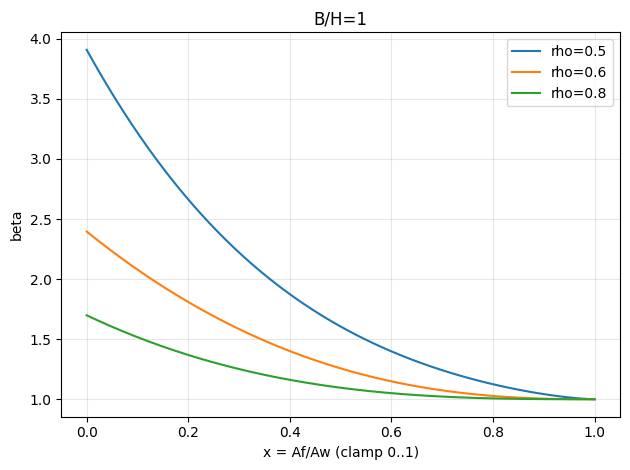

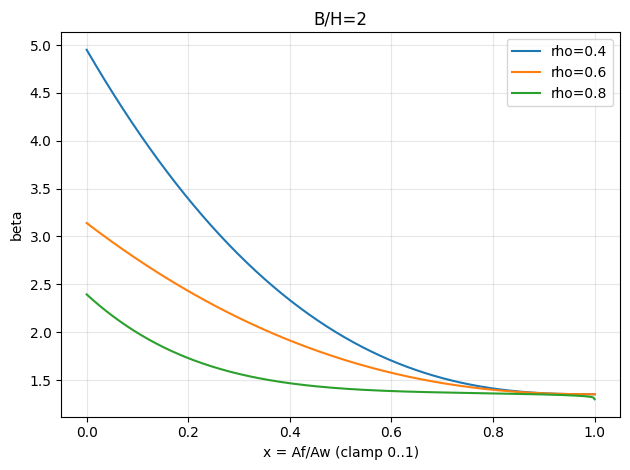

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def clamp01(x):
    return np.clip(x, 0.0, 1.0)

# =========================
# BetaFitBh1
# =========================
def bh1_beta_rho08(x):
    x = clamp01(x)
    return 1.0 + 0.698873 * np.power(1.0 - x, 2.866872)

def bh1_beta_rho06(x):
    x = clamp01(x)
    return 1.0 + 1.395898 * np.power(1.0 - x, 2.442155)

def bh1_beta_rho05(x):
    x = clamp01(x)
    t = 1.0 - x
    return 1.0 + 1.364765 * np.power(t, 1.508847) + 1.544109 * np.power(t, 3.619435)

def bh1_beta(rho, Af, Aw):
    if not np.isfinite(rho):
        raise ValueError("rho 必须是有限实数")
    if Aw <= 0:
        raise ValueError("Aw 必须 > 0")

    x = clamp01(Af / Aw)

    # 允许超出范围
    if rho <= 0.5:
        return float(bh1_beta_rho05(x))
    if rho >= 0.8:
        return float(bh1_beta_rho08(x))

    if rho <= 0.6:
        b05 = bh1_beta_rho05(x)
        b06 = bh1_beta_rho06(x)
        t = (rho - 0.5) / 0.1
        return float(b05 + t * (b06 - b05))
    else:
        b06 = bh1_beta_rho06(x)
        b08 = bh1_beta_rho08(x)
        t = (rho - 0.6) / 0.2
        return float(b06 + t * (b08 - b06))

# =========================
# BetaFitBh2
# =========================
def bh2_beta_rho04(x):
    x = clamp01(x)
    return 1.352128 + 3.597872 * np.power(1.0 - x, 2.539312)

def bh2_beta_rho06(x):
    x = clamp01(x)
    return 1.352128 + 1.788404 * np.power(1.0 - x, 2.266723)

def bh2_beta_rho08(x):
    x = clamp01(x)
    t = 1.0 - x
    return 1.3 + 0.095 * np.power(t, 0.278608) + 1.0 * np.power(t, 4.832105)

def bh2_beta(rho, Af, Aw):
    if Aw <= 0:
        raise ValueError("Aw 必须 > 0")
    if not np.isfinite(rho):
        raise ValueError("rho 必须是有限实数")

    x = clamp01(Af / Aw)

    # 允许超出范围（按你 C# 的逻辑）
    if rho <= 0.4:
        return float(bh2_beta_rho04(x))
    if rho >= 0.8:
        return float(bh2_beta_rho08(x))

    if rho <= 0.6:
        b04 = bh2_beta_rho04(x)
        b06 = bh2_beta_rho06(x)
        a = (rho - 0.4) / 0.2
        return float(b04 + a * (b06 - b04))
    else:
        b06 = bh2_beta_rho06(x)
        b08 = bh2_beta_rho08(x)
        a = (rho - 0.6) / 0.2
        return float(b06 + a * (b08 - b06))

# =========================
# 绘图（两张图）
# =========================
x = np.linspace(0.0, 1.0, 401)

# 图1：Bh1 的三条曲线
plt.figure()
plt.plot(x, bh1_beta_rho05(x), label="rho=0.5")
plt.plot(x, bh1_beta_rho06(x), label="rho=0.6")
plt.plot(x, bh1_beta_rho08(x), label="rho=0.8")

# 可选：画几条插值 rho 的曲线（想更像“面内插值效果”就打开）
# for r in [0.55, 0.65, 0.70, 0.75]:
#     plt.plot(x, [bh1_beta(r, Af=xi, Aw=1.0) for xi in x], label=f"rho={r:g}", linewidth=1)

plt.xlabel("x = Af/Aw (clamp 0..1)")
plt.ylabel("beta")
plt.title("B/H=1")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()

# 图2：Bh2 的三条曲线
plt.figure()
plt.plot(x, bh2_beta_rho04(x), label="rho=0.4")
plt.plot(x, bh2_beta_rho06(x), label="rho=0.6")
plt.plot(x, bh2_beta_rho08(x), label="rho=0.8")

# 可选：插值 rho 曲线
# for r in [0.45, 0.50, 0.55, 0.65, 0.70, 0.75]:
#     plt.plot(x, [bh2_beta(r, Af=xi, Aw=1.0) for xi in x], label=f"rho={r:g}", linewidth=1)

plt.xlabel("x = Af/Aw (clamp 0..1)")
plt.ylabel("beta")
plt.title("B/H=2")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()

plt.show()
